In [84]:
library(readr)
library(here)
library(aTSA)
library(data.table)
library(xtable)

ERROR: Error in library(devtools): there is no package called 'devtools'


### Simulated data

In [88]:
simu_df = read_delim(here('src', 'data', 'simu_data_lecture5.csv'), ";", escape_double = FALSE, trim_ws = TRUE)
head(simu_df)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_double(),
  y1 = col_double(),
  y2 = col_double(),
  y3 = col_double()
)


X1,y1,y2,y3
1,-0.29019744,0.6271137,0.1446046
2,1.00266243,-0.6859215,2.0023816
3,1.84632721,-0.5799288,0.5160091
4,1.27193530,1.3152954,-1.8554488
5,0.02559086,1.8196497,-1.7592665
6,1.58093573,-0.4237137,-1.0224557


In [89]:
y1 = simu_df$y1

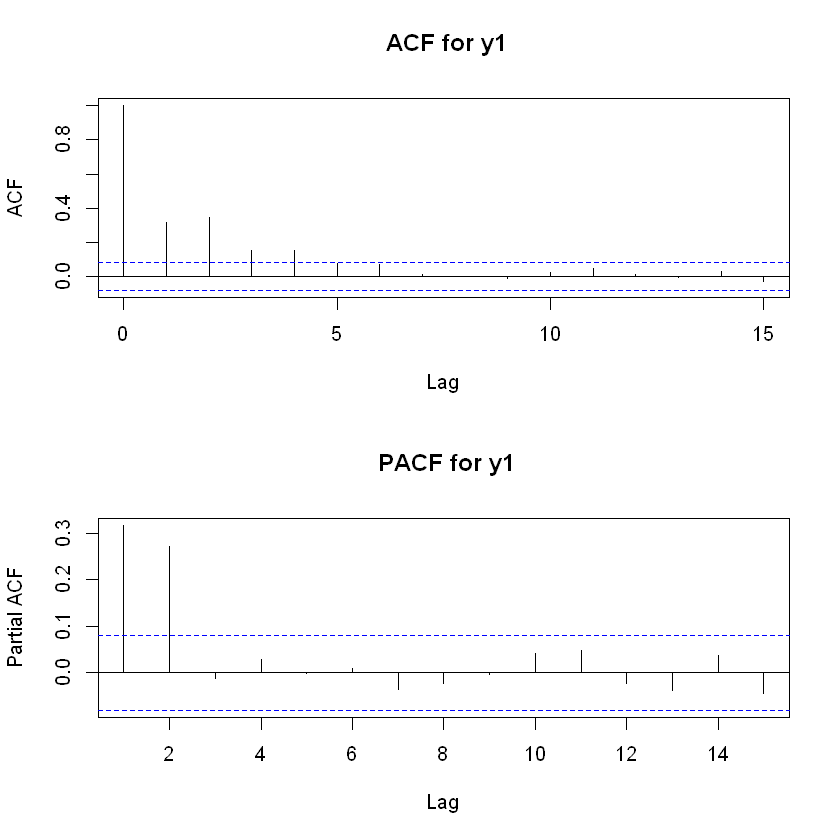

In [90]:
par(mfrow=c(2,1))
acf.inven <- list('acf' = acf(y1, lag.max = 15, main=" ACF for y1"),
                  'pacf' = pacf(y1, lag.max = 15, main=" PACF for y1"))

In [91]:
adf.inven <- adf.test(y1)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -17.58    0.01
[2,]   1 -10.75    0.01
[3,]   2  -9.99    0.01
[4,]   3  -8.99    0.01
[5,]   4  -8.40    0.01
[6,]   5  -7.89    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -17.62    0.01
[2,]   1 -10.78    0.01
[3,]   2 -10.01    0.01
[4,]   3  -9.01    0.01
[5,]   4  -8.42    0.01
[6,]   5  -7.91    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -17.74    0.01
[2,]   1 -10.87    0.01
[3,]   2 -10.14    0.01
[4,]   3  -9.15    0.01
[5,]   4  -8.56    0.01
[6,]   5  -8.08    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [92]:
ic.inven <- list('AIC' = data.table(), 'BIC' = data.table())
for (ar.lag in 0:11) {
  arma.stat <- rep(0, 6)
  for (ma.lag in 0:2) {
    arma.fit <- arima(y1, order = c(ar.lag, 0, ma.lag))
    # arma.fit
    # AIC
    arma.stat[ma.lag + 1] <- arma.fit$aic
    # BIC
    arma.stat[ma.lag + 4] <- -2 * arma.fit$loglik + (ar.lag + ma.lag) * log(length(y1))
  }
  ic.inven$AIC <- rbindlist(list(ic.inven$AIC, data.table(t(arma.stat[1:3]))))
  ic.inven$BIC <- rbindlist(list(ic.inven$BIC, data.table(t(arma.stat[4:6]))))
}
setnames(ic.inven$AIC, c('MA0', 'MA1', 'MA2'))
ic.inven$AIC[, AR := 0:11]
setnames(ic.inven$BIC, c('MA0', 'MA1', 'MA2'))
ic.inven$BIC[, AR := (0:11)]


BIC_selec.mat <- rbind(ic.inven$BIC[, AR := (0:11)])
print(xtable(BIC_selec.mat))

Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible convergence problem: optim gave code = 1"Warning message in arima(y1, order = c(ar.lag, 0, ma.lag)):
"possible

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Fri Nov 06 11:32:29 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & MA0 & MA1 & MA2 & AR \\ 
  \hline
1 & 1797.47 & 1764.61 & 1715.23 &   0 \\ 
  2 & 1740.89 & 1714.47 & 1710.97 &   1 \\ 
  3 & 1701.19 & 1707.47 & 1713.36 &   2 \\ 
  4 & 1707.49 & 1713.71 & 1719.76 &   3 \\ 
  5 & 1713.42 & 1717.39 & 1723.73 &   4 \\ 
  6 & 1719.82 & 1723.88 & 1731.81 &   5 \\ 
  7 & 1726.16 & 1732.34 & 1734.21 &   6 \\ 
  8 & 1731.79 & 1738.01 & 1741.21 &   7 \\ 
  9 & 1737.86 & 1744.26 & 1747.01 &   8 \\ 
  10 & 1744.26 & 1748.03 & 1749.79 &   9 \\ 
  11 & 1749.69 & 1755.54 & 1759.78 &  10 \\ 
  12 & 1754.60 & 1760.87 & 1762.39 &  11 \\ 
   \hline
\end{tabular}
\end{table}


In [132]:
arma_y1 <- arima(simu_df$y1, order = c(2, 0, 0))

In [136]:
library('xts')

Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last



In [139]:
as.ts(simu_df$y1)

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

In [131]:
install.packages("devtools") 

also installing the dependencies 'jsonlite', 'rlang'



package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daniel.oliveira\.conda\envs\quant2\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\daniel.oliveira\.conda\envs\quant2\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daniel.oliveira\.conda\envs\quant2\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\daniel.oliveira\.conda\envs\quant2\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daniel.oliveira\AppData\Local\Temp\Rtmp4UleVG\downloaded_packages


In [127]:
devtools::install_github('IRkernel/repr')

ERROR: Error: .onLoad failed in loadNamespace() for 'pkgload', details:
  call: loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]])
  error: namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.1 is required


In [111]:
install.packages('rlang')

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daniel.oliveira\.conda\envs\quant2\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\daniel.oliveira\.conda\envs\quant2\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\daniel.oliveira\AppData\Local\Temp\Rtmp4UleVG\downloaded_packages


### Model diagnostic

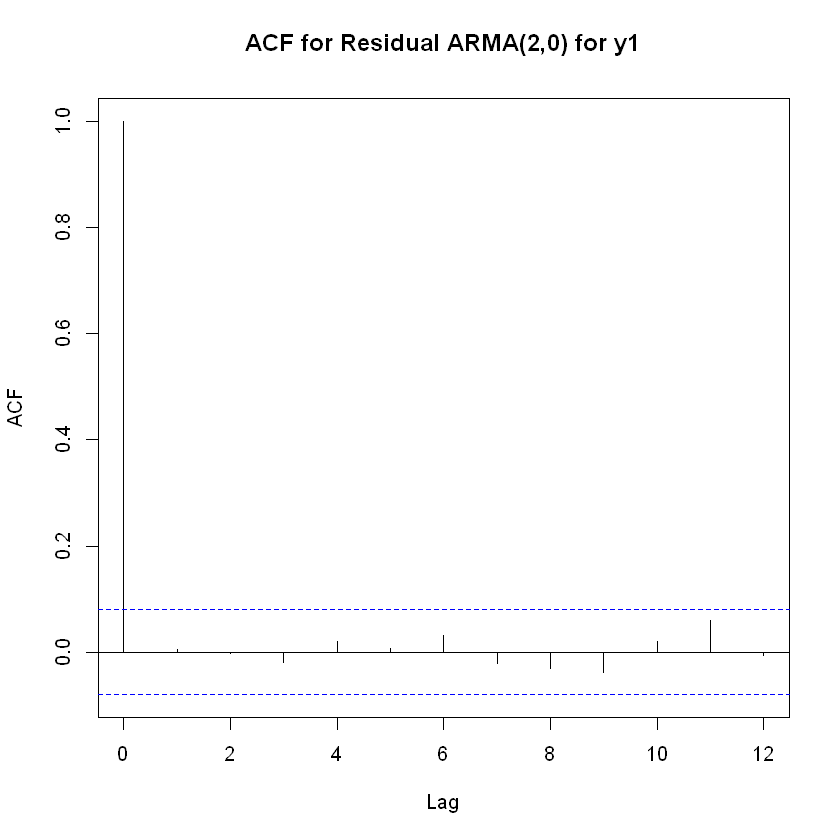

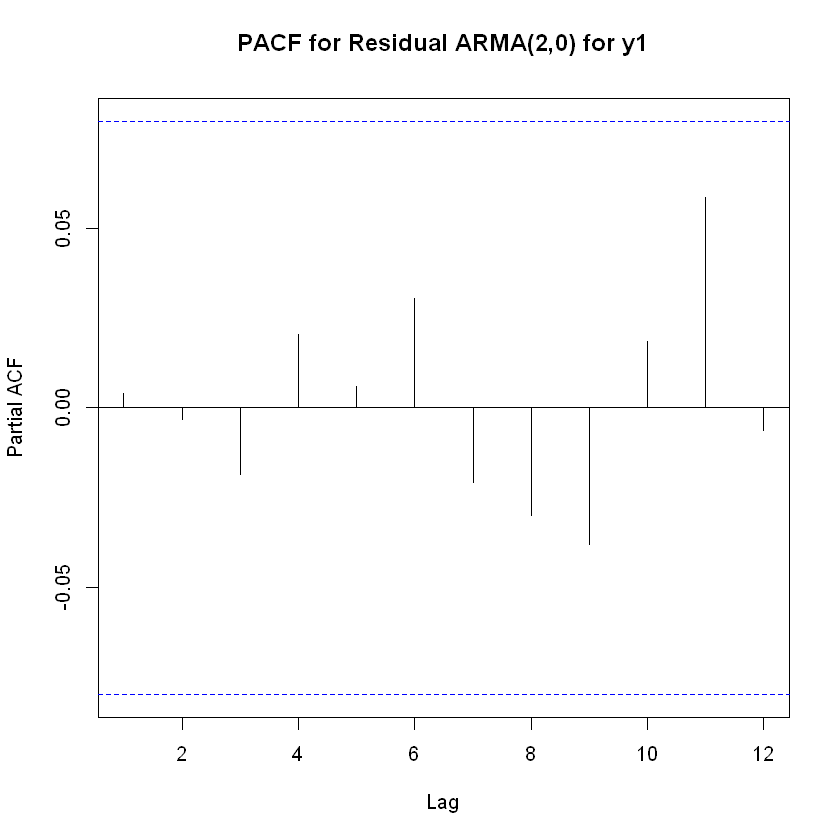

In [44]:
acf.inven$resid <- list('acf' = acf(arma_y1$residuals, lag.max = 12, main="ACF for Residual ARMA(2,0) for y1"),
                        'pacf' = pacf(arma_y1$residuals, lag.max = 12, main="PACF for Residual ARMA(2,0) for y1"))

In [ ]:
white_test_df = cbind()

arima.inven[1:72, eps := as.numeric(arma.fit$rcpi$residuals)]
arima.inven[2:72, 'eps1' := diff(arima.inven[1:72, eps], 1)]
arima.inven[3:72, 'eps2' := diff(arima.inven[2:72, eps1], 1)]

In [ ]:
summary(lm(eps ~ eps1 + eps2, data = arima.inven[3:72]))

In [ ]:
white.test(arma.fit$rcpi$residuals)